In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv(r'train.csv')

In [3]:
df2=pd.read_csv(r'Test_dataset.csv')

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [6]:
df1 = df1[df2.columns]

In [7]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
df = pd.concat([df1, df2], axis=0)

In [9]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [12]:
from sklearn.impute import KNNImputer
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the data
imputed_data = imputer.fit_transform(df1[['Age', 'SibSp', 'Pclass']])

# Create a DataFrame from the imputed data
df_imputed = pd.DataFrame(imputed_data, columns=['Age', 'SibSp', 'Pclass'])

# Update the original DataFrame with the imputed 'Age' column
df['Age'] = df_imputed['Age']

In [13]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,45.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,44.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,30.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,34.0,0,0,359309,8.0500,NaN,S,0


In [14]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [15]:
df=df.drop(columns=['Cabin'])

In [16]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [17]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
Survived       0
dtype: int64

In [18]:
df=df.dropna()

In [19]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Pclass       1306 non-null   int64  
 2   Name         1306 non-null   object 
 3   Sex          1306 non-null   object 
 4   Age          1306 non-null   float64
 5   SibSp        1306 non-null   int64  
 6   Parch        1306 non-null   int64  
 7   Ticket       1306 non-null   object 
 8   Fare         1306 non-null   float64
 9   Embarked     1306 non-null   object 
 10  Survived     1306 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 122.4+ KB


In [21]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000,1306.000000
mean,655.022205,2.296325,29.747259,0.50000,0.385911,33.223956,0.372129
std,377.913727,0.837037,14.140439,1.04258,0.866357,51.765986,0.483558
min,1.000000,1.000000,0.420000,0.00000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.00000,0.000000,7.895800,0.000000
50%,654.500000,3.000000,30.000000,0.00000,0.000000,14.454200,0.000000
75%,981.750000,3.000000,36.875000,1.00000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.00000,9.000000,512.329200,1.000000


## Analyze Survival Rate by Gender

In [22]:
gender_survival = df.groupby('Sex')['Survived'].mean()

In [23]:
gender_survival

Sex
female    0.775862
male      0.149644
Name: Survived, dtype: float64

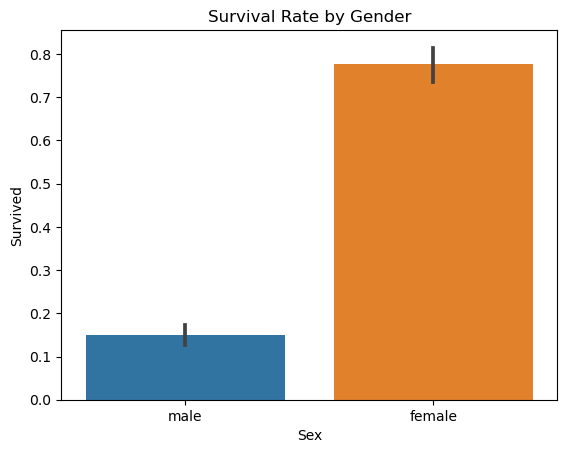

In [24]:
# Visualize the survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

###  - Analysis:
The `groupby('Sex')['Survived'].mean()` command calculates the average survival rate for each gender. 
The barplot visually shows that female survival rate is more compared than males

##  Analyze Survival Rate by Passenger Class

In [25]:
class_survival = df.groupby('Pclass')['Survived'].mean()

In [26]:
class_survival

Pclass
1    0.626168
2    0.418773
3    0.238701
Name: Survived, dtype: float64

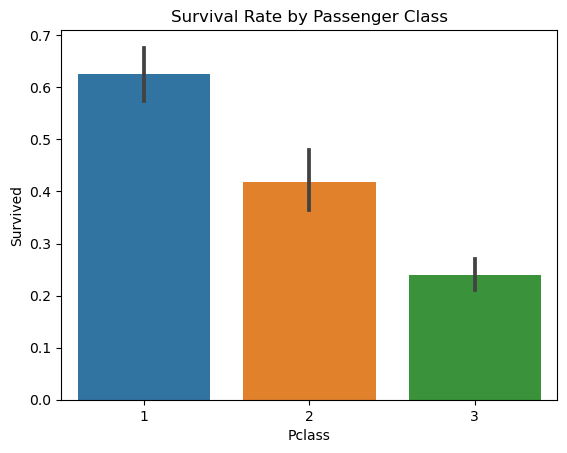

In [27]:
# Visualize the survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

The `groupby('Pclass')['Survived'].mean()` command calculates the survival rate for each passenger class. 
The barplot shows that 1st class people survived more thatn the other 2 classes

## Analyze Survival Rate by Port of Embarkation

In [28]:
embarkation_survival = df.groupby('Embarked')['Survived'].mean()

In [29]:
embarkation_survival

Embarked
C    0.533333
Q    0.439024
S    0.315444
Name: Survived, dtype: float64

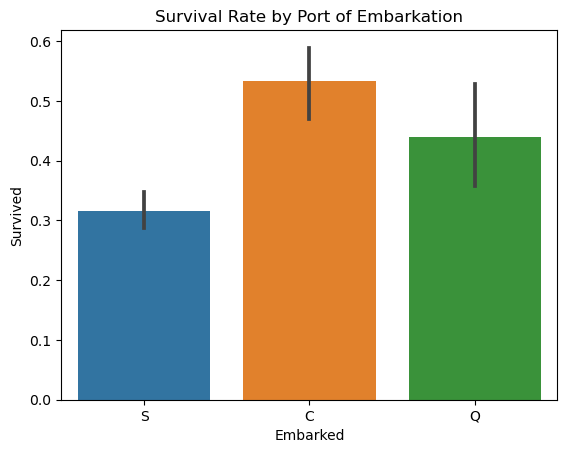

In [30]:
# Visualize the survival rate by port of embarkation
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Port of Embarkation')
plt.show()

The `groupby('Embarked')['Survived'].mean()` command calculates the survival rate based on where passengers boarded the Titanic. 
he barplot shows survival rates of Cherbourg is more compared to Queenstown and Southampton

## Analyze Survival Rate by Gender and Class (Combined Analysis)

In [31]:
gender_class_survival = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

In [32]:
gender_class_survival

Pclass,1,2,3
Sex,,,
female,0.978873,0.933962,0.564815
male,0.346369,0.099415,0.095528


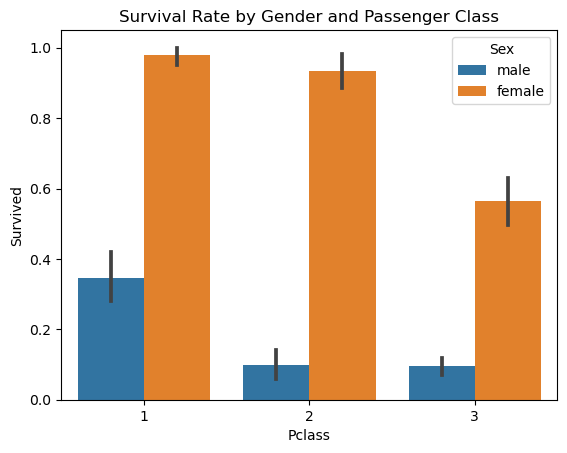

In [33]:
# Visualize the survival rate by gender and class
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

This barplot visualize at how gender and class together influence survival rates, offering more granular insight into the data.